In [ ]:
# Mounting Google Drive to get zip file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzipping file
!unzip "/content/drive/MyDrive/Datasets/braintumordataset.zip" -d "/content/Brain Tumour Dataset"

Archive:  /content/drive/MyDrive/Datasets/braintumordataset.zip
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/annotations_test.json  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y701.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y702.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y703.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y704.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y705.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y706.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y707.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y708.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y709.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y710.jpg  
  inflating: /content/Brain Tumour Dataset/Br35H-Mask-RCNN/TEST/y711.jpg  
  inflating: /content/B

In [ ]:
# importing all the necessary libraries
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import cv2
import random
import shutil
import glob
import pandas as pd

In [ ]:
# function for importing data
def importing_data(p):
  sample = []
  for filename in glob.glob(p):
    sample.append(filename)
  return sample


path1 = '/content/Brain Tumour Dataset/no/*.jpg'
path2 = '/content/Brain Tumour Dataset/yes/*.jpg'

no_train = importing_data(path1)
yes_train = importing_data(path2)

# setting dataframes with the labels for both the healthy and affected images
dataframe_train_n = pd.DataFrame({'image': no_train, 'label' : 'Healthy'})
dataframe_train_y = pd.DataFrame({'image': yes_train, 'label' : 'Affected'})

train_data = pd.concat([dataframe_train_n, dataframe_train_y])
train_data.head()

,image,label
0,/content/Brain Tumour Dataset/no/no37.jpg,Healthy
1,/content/Brain Tumour Dataset/no/no75.jpg,Healthy
2,/content/Brain Tumour Dataset/no/no1327.jpg,Healthy
3,/content/Brain Tumour Dataset/no/no302.jpg,Healthy
4,/content/Brain Tumour Dataset/no/no558.jpg,Healthy


<h1>Splitting the dataset</h1>
The dataset is split into train, validation and test datasets in the following combination


*   20% Test data
*   (85% Train Data & 15% Validation Data) from the remaining 80%



In [ ]:

X_trainandval, X_test = train_test_split(train_data,
                                  test_size=0.2,
                                  shuffle=True,
                                  random_state=42)

X_train, X_val = train_test_split(X_trainandval,
                                  test_size=0.15,
                                  shuffle=True,
                                  random_state=42)

<h1>Building a Model</h1>
The model that we are building is a simple CNN model for binary image classificiation (as indicated in the diagram), since we only need to determine if the imagine has a tumor or not.

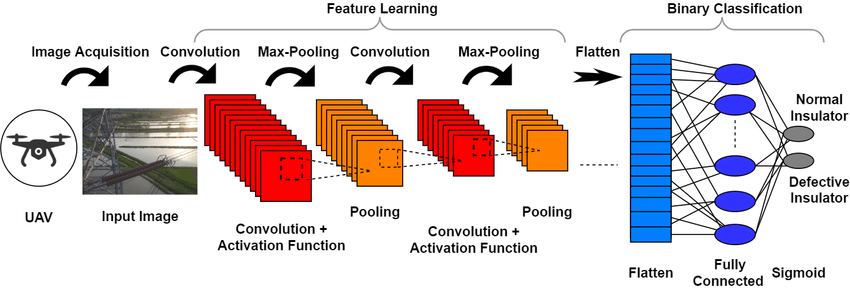

In [ ]:
model = Sequential()

# First Convolutional Layer with Activation Layer & MaxPooling
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Layer with Activation Layer & MaxPooling
model.add(Conv2D(filters = 64, kernel_size = (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Final Convolutional Layer with Activation Layer & MaxPooling
model.add(Conv2D(filters = 128, kernel_size = (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting
model.add(Dropout(rate=0.25))

# Flatten the feature maps
model.add(Flatten())

# Full Connected Layers
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       4,718,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,975,745 (18.98 MB)

 Trainable params: 4,975,745 (18.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling Model using Adam Optimizer & BCE loss
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
def modelFit(train_data, val_data):
  # Early Stopping of the model's accuracy and loss values do not improve
  es = EarlyStopping(monitor = 'val_loss', mode = 'min',
                     patience = 2,
                     restore_best_weights = True,
                     verbose = 1)

  # Saves the best model
  mc = ModelCheckpoint('best_model.keras', monitor = 'val_loss',
                       mode = 'min', save_best_only = True)

  # Reducing learning rate when validation loss stops improving to help with convergence
  reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.3,
                                patience = 2,
                                min_lr = 1e-5,
                                mode = 'min',
                                verbose = 1)

  # Training the data in 50 epochs (max) with 10 batch size
  history = model.fit(train_data,
                      validation_data = val_data,
                      epochs = 50,
                      batch_size = 10,
                      callbacks = [es, mc, reduce_lr])

  return history

In [ ]:
# Setting parameters to be used in training
k_fold = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
n_CLASS = 2

def CV_training (train_data, val_data):
  cv_histories = []
  for i in range (k_fold):

    # Normalizing the image pixel values
    datagen = ImageDataGenerator(rescale = 1./255)

    # loading values straight from dataframes
    train_set = datagen.flow_from_dataframe(train_data,
                                            directory = '/content/Brain Tumour Dataset/*.jpg',
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = size,
                                            color_mode = 'grayscale',
                                            class_mode = 'binary',
                                            batch_size = 10,
                                            shuffle = True,
                                            interpolation = 'bilinear')

    val_set = datagen.flow_from_dataframe(val_data,
                                            directory = '/content/Brain Tumour Dataset/*.jpg',
                                            x_col = 'image',
                                            y_col = 'label',
                                            target_size = size,
                                            color_mode = 'grayscale',
                                            class_mode = 'binary',
                                            batch_size = 10,
                                            shuffle = True,
                                            interpolation = 'bilinear')

  print("Training on fold: ", i+1)

  cv_histories.append(modelFit(train_set, val_set))

  return cv_histories

cv_results = CV_training (X_train, X_val)

Found 2040 validated image filenames belonging to 2 classes.
Found 360 validated image filenames belonging to 2 classes.
Found 2040 validated image filenames belonging to 2 classes.
Found 360 validated image filenames belonging to 2 classes.
Found 2040 validated image filenames belonging to 2 classes.
Found 360 validated image filenames belonging to 2 classes.
Training on fold:  3
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


204/204 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.7250 - loss: 0.5659 - val_accuracy: 0.8139 - val_loss: 0.4236 - learning_rate: 1.0000e-04
Epoch 2/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8546 - loss: 0.3420 - val_accuracy: 0.8889 - val_loss: 0.2702 - learning_rate: 1.0000e-04
Epoch 3/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9155 - loss: 0.2322 - val_accuracy: 0.9056 - val_loss: 0.1949 - learning_rate: 1.0000e-04
Epoch 4/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9456 - loss: 0.1590 - val_accuracy: 0.9250 - val_loss: 0.1961 - learning_rate: 1.0000e-04
Epoch 5/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.9681 - loss: 0.1201 - val_accuracy: 0.9556 - val_loss: 0.1288 - learning_rate: 1.0000e-04
Epoch 6/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9812 - loss: 0.0683 - val_accuracy: 0.9472 - val_loss: 0.1178 - learning_rate: 1.0000e-04
Epoch 7/50
204/204 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 

In [ ]:
# Printing out the validation accuracy & loss
def acc_results(results):
  i = 0
  for fold in cv_results:
    print('Val_Acc Folder: '+ str(i) + ' = ', max(fold.history['val_accuracy']))
    print('Val_Loss Folder: '+ str(i) + ' = ', min(fold.history['val_loss']))
    i += 1

acc_results(cv_results)

Val_Acc Folder: 0 =  0.9888888597488403
Val_Loss Folder: 0 =  0.04200321435928345


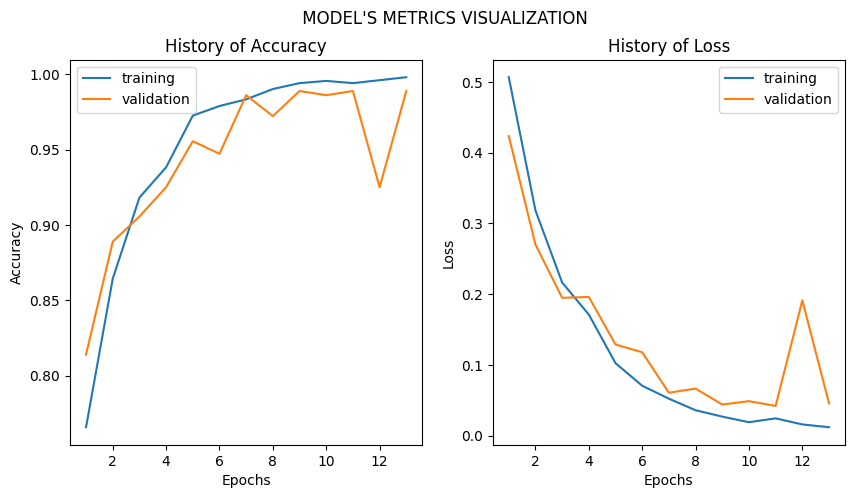

In [ ]:
# Plotting the loss & accuracy of both the training and validation datasets in each epoch
def Acc_Loss_Plot (results):
  for fold in results:
    acc = fold.history['accuracy']
    val_acc = fold.history['val_accuracy']
    loss = fold.history['loss']
    val_loss = fold.history['val_loss']
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

Acc_Loss_Plot(cv_results)




In [ ]:
# loading up the model to run the test dataset
loaded_model = keras.models.load_model('best_model.keras')
loaded_model.compile (optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Normzalizing test dataset images & loading images from dataframe
test_datagen  = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_dataframe(X_test,
                                         directory = '/content/Brain Tumour Dataset/*.jpg',
                                         x_col = 'image',
                                         y_col = 'label',
                                         target_size = size,
                                         color_mode = 'grayscale',
                                         class_mode = 'binary',
                                         batch_size = 10,
                                         shuffle = False,
                                         interpolation = 'bilinear')

# Feeding the test images to the loaded model to determine accuracy
loss, accuracy = loaded_model.evaluate(test_set)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 600 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9710 - loss: 0.0685
Test Accuracy: 96.67%


<h1>Printing out a batch of the test dataset's expected and actual output</h1>

In [ ]:
# Get the first batch of images and actual labels
images, actual_labels = next(test_set)

# Predict labels for the first batch
predicted_probs = loaded_model.predict(images)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()  # Converts probabilities to binary (0 or 1)

# Map 1 to 'Affected' and 0 to 'Healthy'
label_map = {1: "Affected", 0: "Healthy"}
predicted_labels_mapped = [label_map[label] for label in predicted_labels]
actual_labels_mapped = [label_map[label] for label in actual_labels.astype(int)]

# Print actual and predicted labels with mapped values
print("Predicted labels:", predicted_labels_mapped)
print("Actual labels:   ", actual_labels_mapped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted labels: ['Healthy', 'Affected', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']
Actual labels:    ['Healthy', 'Affected', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy']


<h1>Plotting the first batch of images of the test dataset along with their predicted & actual labels</h1>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


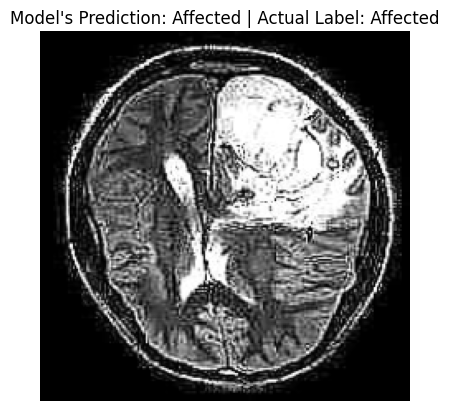

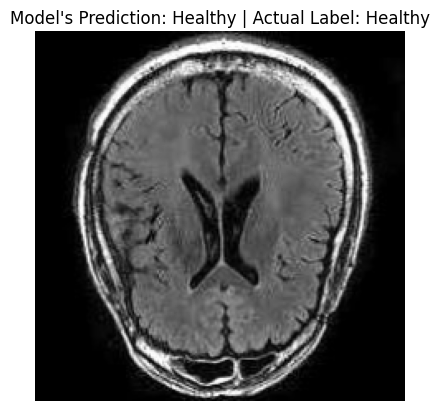

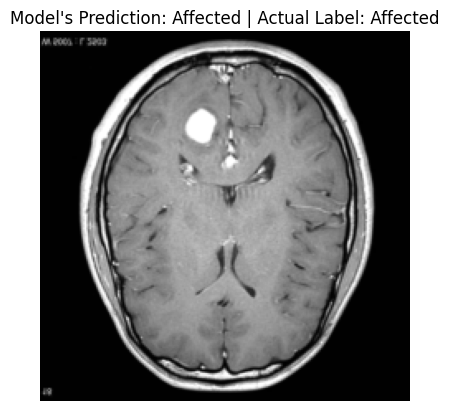

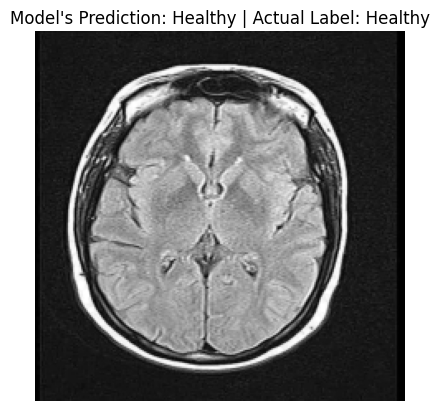

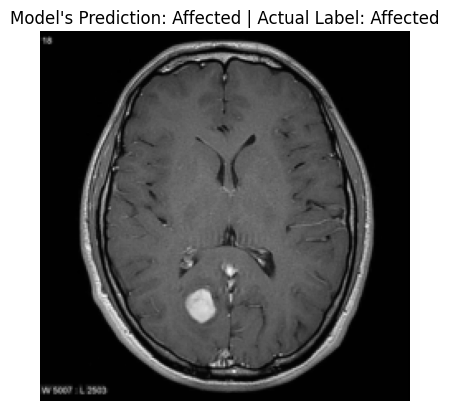

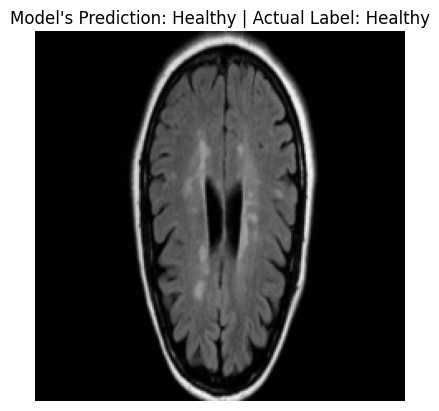

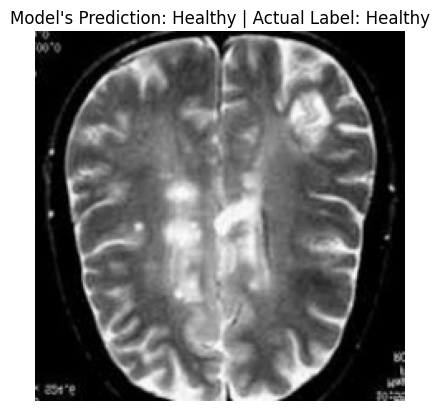

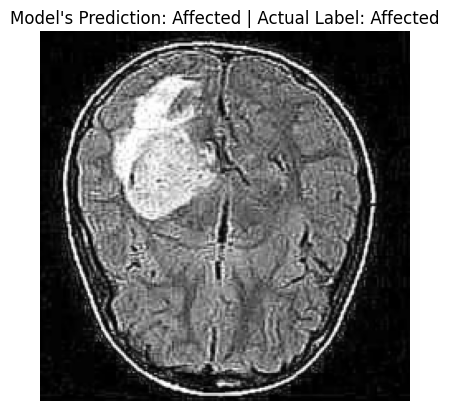

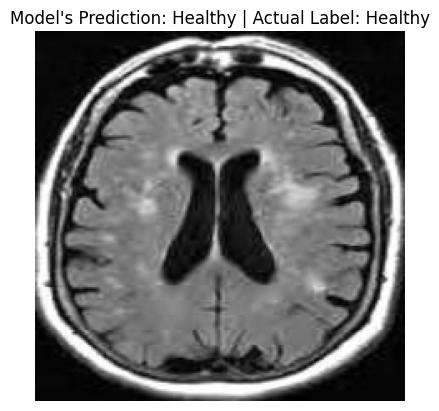

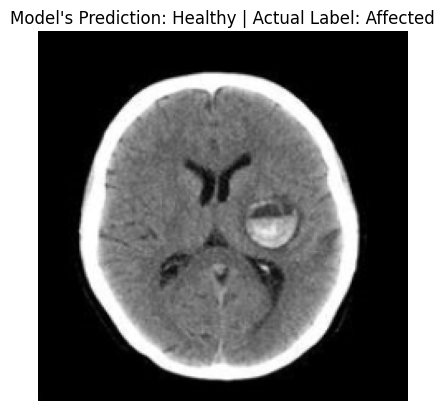

In [ ]:
images10, actual_labels10 = test_set[0]  # First batch (10 images)

# Predict labels for the first batch
predicted_probs = loaded_model.predict(images10)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()  # Converts probabilities to binary (0 or 1)

# Map 0 to "Healthy" and 1 to "Affected" for better readability
label_map = {0: "Healthy", 1: "Affected"}
predicted_labels_mapped = [label_map[label] for label in predicted_labels]
actual_labels_mapped = [label_map[label] for label in actual_labels10.astype(int)]

# Zip the images, predicted labels, and actual labels for visualization
final_pred = zip(images10, predicted_labels_mapped, actual_labels_mapped)

# Visualization function
def pre_visualization(data, predictions, actual_labels):
    for image, pred, actual in final_pred:
        plt.imshow(image.reshape(224, 224), cmap='gray')
        plt.title(f"Model's Prediction: {pred} | Actual Label: {actual}")
        plt.axis('off')  # Hide axes for a cleaner look
        plt.show()

# Call the visualization function
pre_visualization(images10, predicted_labels_mapped, actual_labels_mapped)